In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from astroquery.gaia import Gaia
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

from astropy.table import Table

from itertools import chain

import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

In [125]:
linewidths = 2
axislinewidths = 2
lenticks = 6

rc('font', family='sans-serif', size=12)
rc('xtick.major', size=lenticks)
rc('xtick.minor', size=lenticks * 2 / 3)
rc('ytick.major', size=lenticks)
rc('ytick.minor', size=lenticks * 2 / 3)
rc('lines', linewidth=linewidths)
rc('axes', linewidth=axislinewidths)

In [41]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
        print (table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour


gdr3_tables = Gaia.load_tables('external.gaiadr3.gaiadr3.gaia_source')
for table in gdr3_tables:
    print (table.get_qualified_name())

In [44]:
fgkm_table = Gaia.load_table('gaiadr3.gold_sample_fgkm_stars')
fgkm_table.columns
for column in fgkm_table.columns:
    print(column.name, "\n", column.description, "\n")

Retrieving table 'gaiadr3.gold_sample_fgkm_stars'
source_id 
 Unique source identifier (unique within a particular Data Release) 

teff_gspphot 
 Effective temperature from GSP-Phot Aeneas best library using BP/RP spectra 

logg_gspphot 
 Surface gravity from GSP-Phot Aeneas best library using BP/RP spectra 

mh_gspphot 
 Global metallicity from GSP-Phot Aeneas best library using BP/RP spectra 

ag_gspphot 
 Extinction in G band from GSP-Phot Aeneas best library using BP/RP spectra 

ebpminrp_gspphot 
 Reddening E(BP-RP) from GSP-Phot Aeneas best library using BP/RP spectra 

alphafe_gspspec 
 Median abundance of alpha-elements [alphe/Fe] with respect to iron from GSP-Spec MatisseGauguin using RVS spectra and monte carlo realizations 

teff_gspspec 
 Median value of the effective temperature from GSP-Spec MatisseGauguin monte carlo realizations using RVS spectra 

logg_gspspec 
 Median value of logarithm of the stellar surface gravity using RVS spectra and monte carlo realizations 

mh

In [62]:
job = Gaia.launch_job_async("SELECT lum_flame, mass_flame, age_flame, teff_gspphot  \
FROM  gaiadr3.gold_sample_fgkm_stars" \
, dump_to_file=True, name='fgkm', output_format='fits')

table_fgkm = job.get_results()

In [174]:
job2 = Gaia.launch_job_async("SELECT mh_gspspec, spectraltype_esphs  \
FROM  gaiadr3.gold_sample_fgkm_stars" \
, dump_to_file=True, name='fgkm2', output_format='fits')

table_fgkm2 = job2.get_results()

In [106]:
l = table_fgkm['lum_flame']
m = table_fgkm['mass_flame']
a = table_fgkm['age_flame']
t = table_fgkm['teff_gspphot']

In [175]:
z = table_fgkm2['mh_gspspec']
stype = table_fgkm2['spectraltype_esphs']

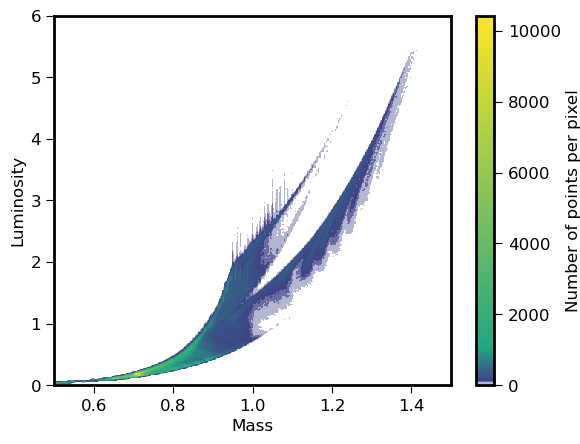

In [144]:
# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-2, '#404388'),
    (1e-1, '#21a784'),
    (1, '#fde624'),
], N=256)

def mlml(fig, m, l):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(m, l, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')
    ax.set_xlim([0.5,1.5])
    ax.set_ylim([0,6])
    ax.setxlabel("Mass")
    ax.set_ylabel("Luminosity")

fig = plt.figure()
mlml(fig, m, l)
plt.show()

#ax_LT ax_TA ax_MA

<Figure size 640x480 with 0 Axes>

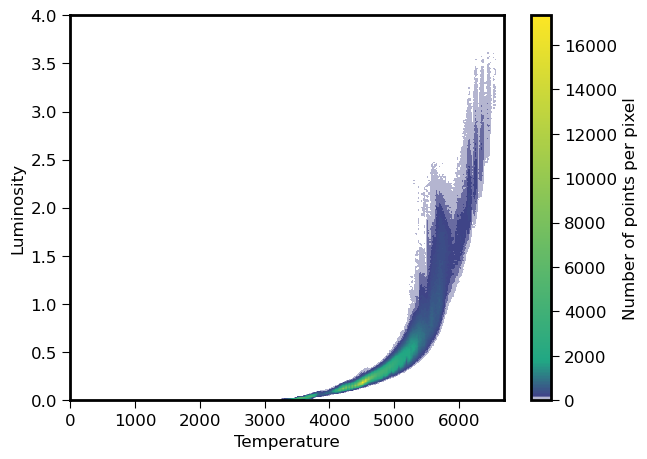

In [153]:
def tltl(fig, t, l):
    fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': 'scatter_density'})
    density = ax.scatter_density(t, l, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')
    ax.set_xlim([0,6700])
    ax.set_ylim([0,4])
    ax.set_xlabel("Temperature [K]")
    ax.set_ylabel("Luminosity")

fig = plt.figure()
tltl(fig, t, l)
plt.show()

#ax_LT ax_TA ax_MA

def atat(fig, a, t):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(a, t, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')
    #ax.set_xlim([0.5,1.5])
    #ax.set_ylim([0,6])
    ax.set_xlabel("Age")
    ax.set_ylabel("Temperature")

fig = plt.figure()
atat(fig, a, t)
plt.show()

#ax_TA ax_MA

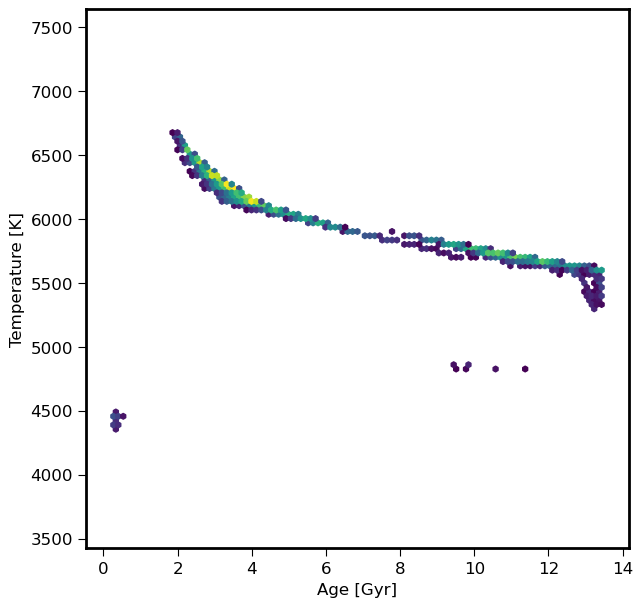

In [190]:
fig, atat = plt.subplots(1, 1, figsize=(7, 7))

atat.hexbin(a, t, bins='log', mincnt=900)
atat.set_xlabel('Age [Gyr]')
atat.set_ylabel('Temperature [K]')
plt.show()

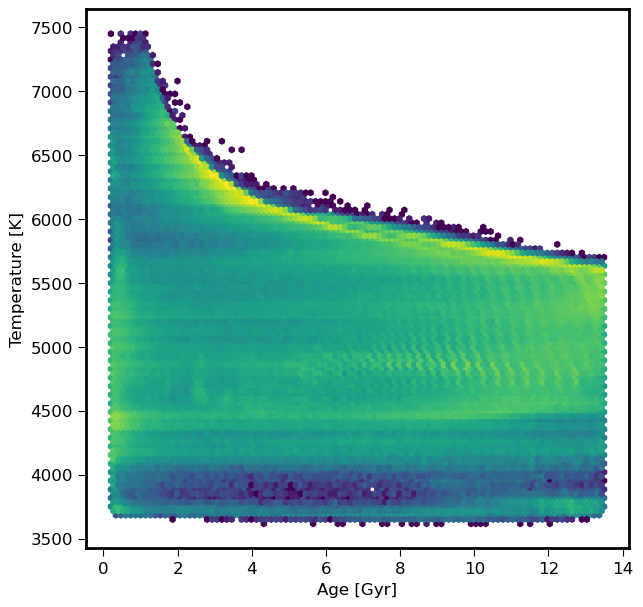

In [191]:
fig, atat = plt.subplots(1, 1, figsize=(7, 7))

atat.hexbin(a, t, bins='log', mincnt=1)
atat.set_xlabel('Age [Gyr]')
atat.set_ylabel('Temperature [K]')
plt.show()

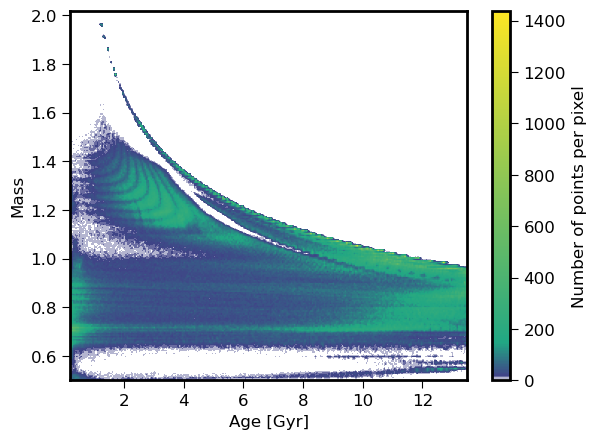

In [192]:
def amam(fig, a, m):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(a, m, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')
    #ax.set_xlim([0.5,1.5])
    #ax.set_ylim([0,6])
    ax.set_xlabel("Age [Gyr]")
    ax.set_ylabel("Mass")

fig = plt.figure()
amam(fig, a, m)
plt.show()

#ax_TA ax_MA

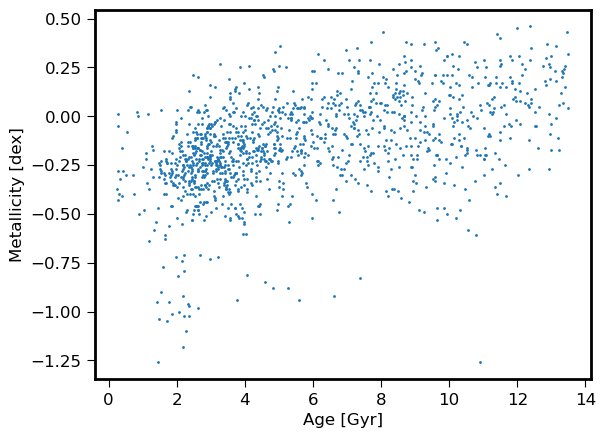

In [188]:
#ax_LT ax_TA ax_MA

#x, y = np.polyfit(a, z, 2)

fig, axaz = plt.subplots(1, 1)
axaz.scatter(a, z, s=1)
#axaz.plot(a, x*a+y)  
axaz.set_xlabel("Age [Gyr]")
axaz.set_ylabel("Metallicity [dex]")

plt.show()

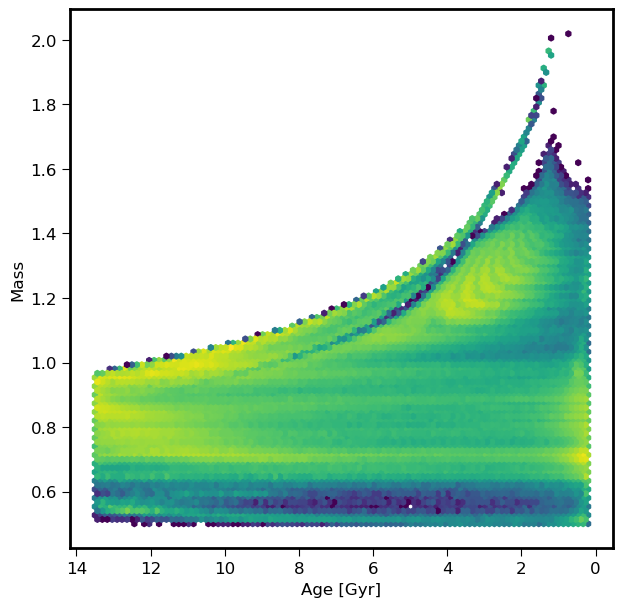

In [193]:
fig, am = plt.subplots(1, 1, figsize=(7, 7))

am.hexbin(a, m, bins='log', mincnt=1)
am.set_xlabel('Age [Gyr]')
am.set_ylabel('Mass')
am.invert_xaxis()
plt.show()

WOOOOOOOOOOOOO0000000oooooooo.......... (deflating balloon)